**Problem**

In present Students in universities or institutes experience due to various reasons. For example academic pressure,

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot


In [ ]:
# Import data

data_sheet = pd.read_csv("Employee.csv")
df = pd.DataFrame(data_sheet)
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [ ]:
# Information about dataset
print(df.describe())

       JoiningYear  PaymentTier          Age  ExperienceInCurrentDomain  \
count  4653.000000  4653.000000  4653.000000                4653.000000   
mean   2015.062970     2.698259    29.393295                   2.905652   
std       1.863377     0.561435     4.826087                   1.558240   
min    2012.000000     1.000000    22.000000                   0.000000   
25%    2013.000000     3.000000    26.000000                   2.000000   
50%    2015.000000     3.000000    28.000000                   3.000000   
75%    2017.000000     3.000000    32.000000                   4.000000   
max    2018.000000     3.000000    41.000000                   7.000000   

        LeaveOrNot  
count  4653.000000  
mean      0.343864  
std       0.475047  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [ ]:
x = df.drop("LeaveOrNot", axis=1)
y = df["LeaveOrNot"]

In [ ]:
# Create Q-Q plots and Histograms for all numercial columns
numerical_features = x.select_dtypes(include=["int64"]).columns
print(numerical_features)


Index(['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain'], dtype='object')


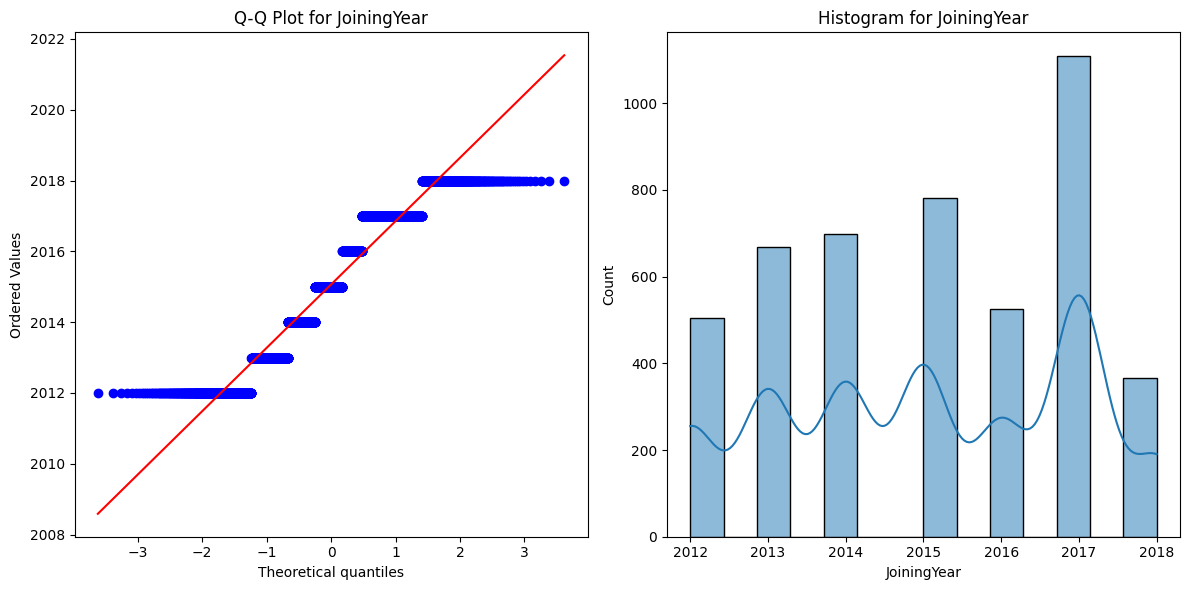

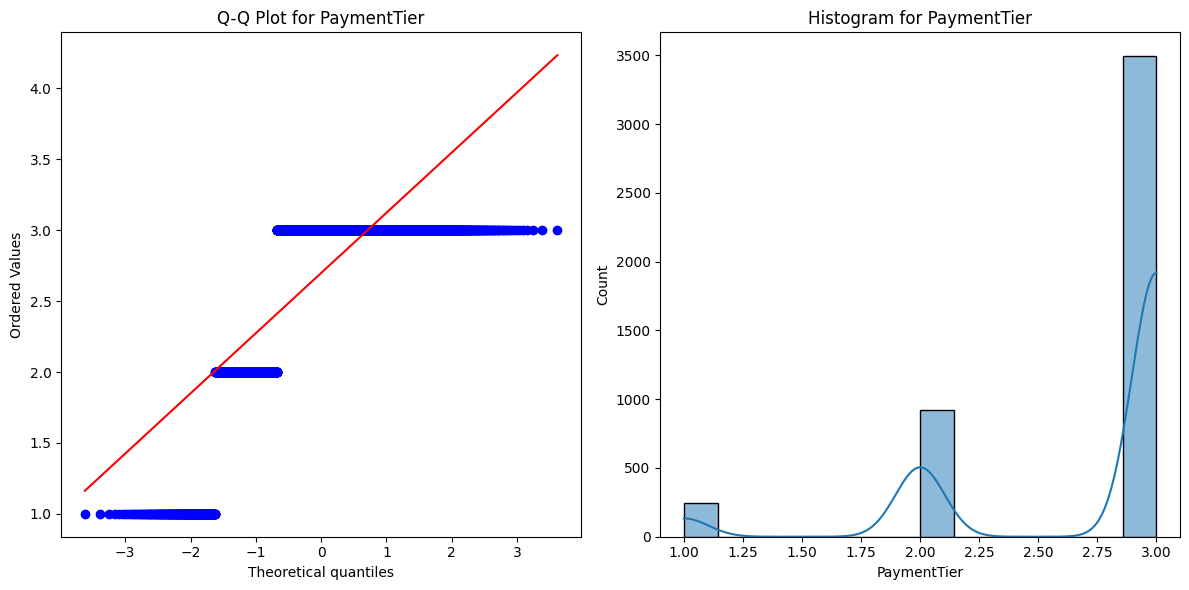

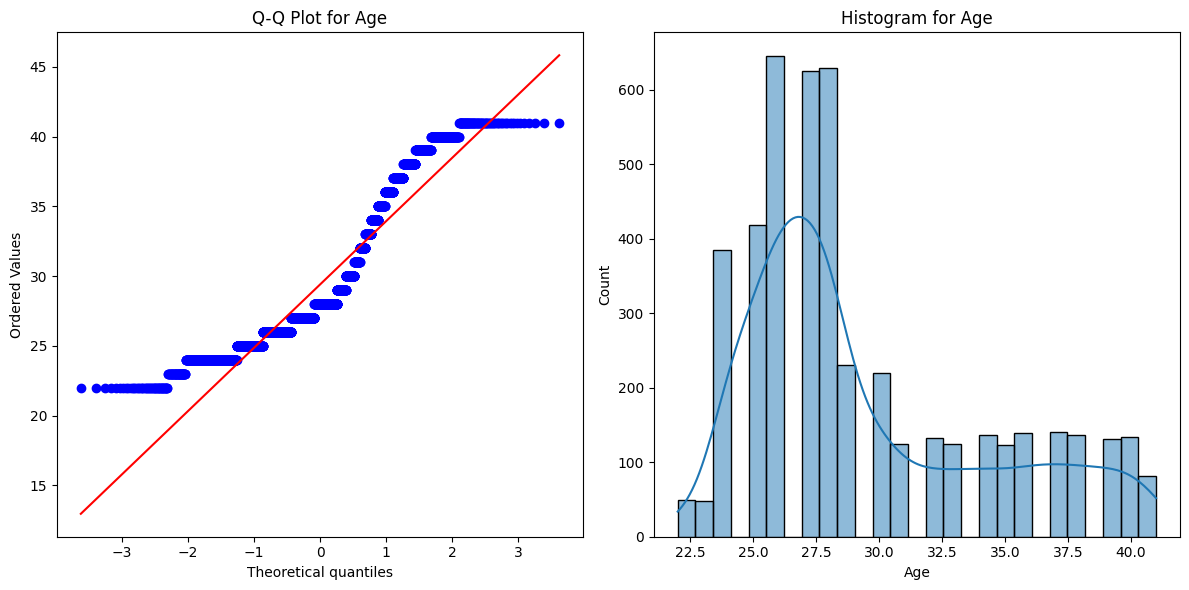

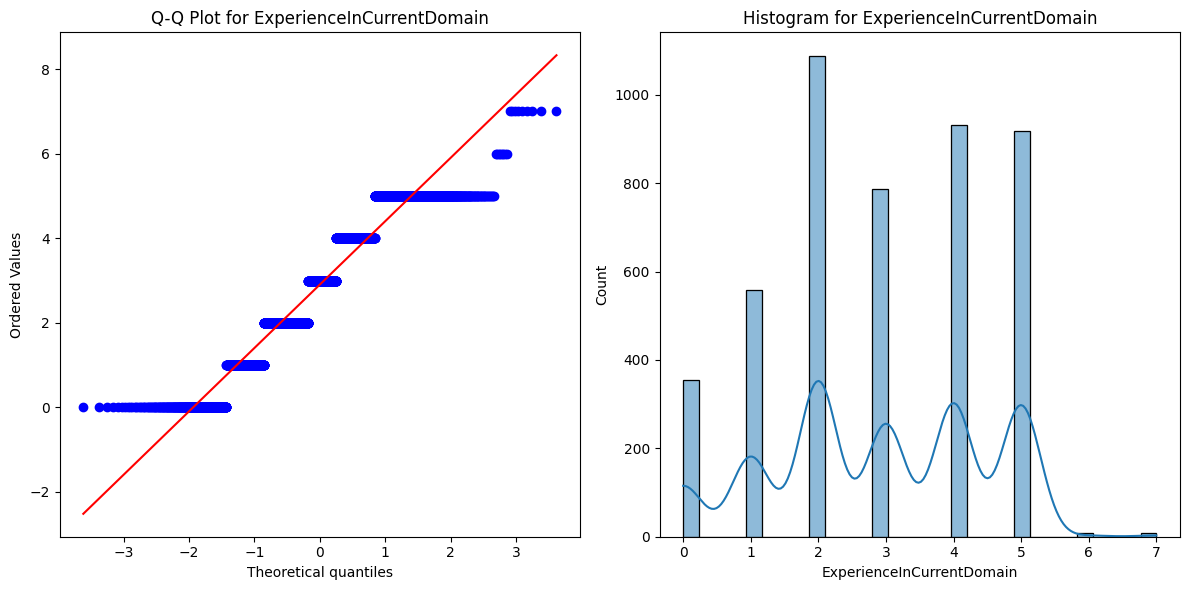

In [ ]:
for feature in numerical_features:
  plt.figure(figsize=(12,6))

  #Q-Q plots
  plt.subplot(1,2,1)
  probplot(df[feature].dropna(), dist="norm", plot=plt)
  plt.title(f"Q-Q Plot for {feature}")

  #Histograms
  plt.subplot(1,2,2)
  sns.histplot(df[feature].dropna(), kde=True)
  plt.title(f"Histogram for {feature}")

  plt.tight_layout()
  plt.show()



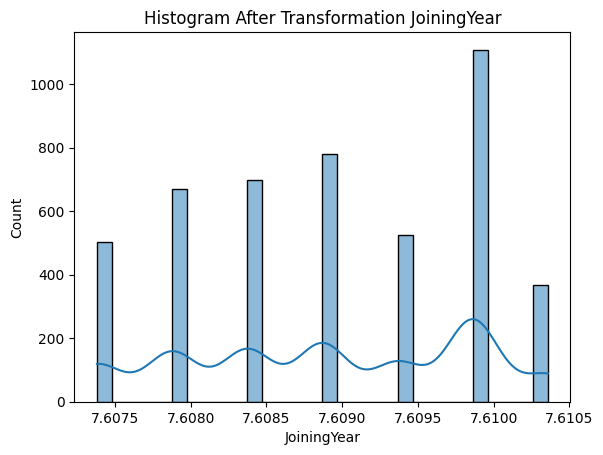

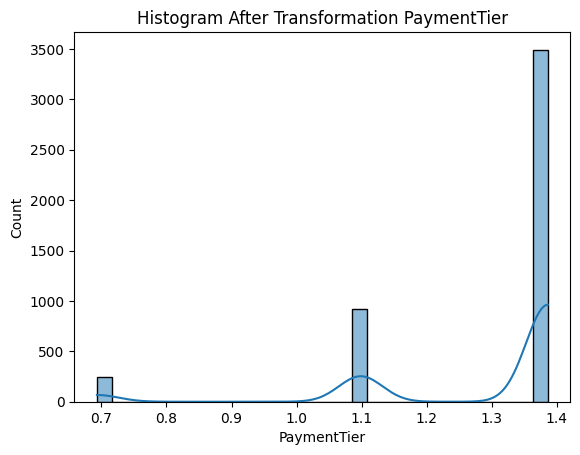

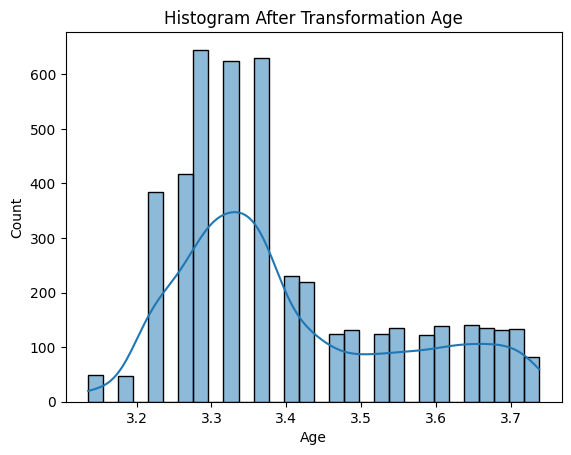

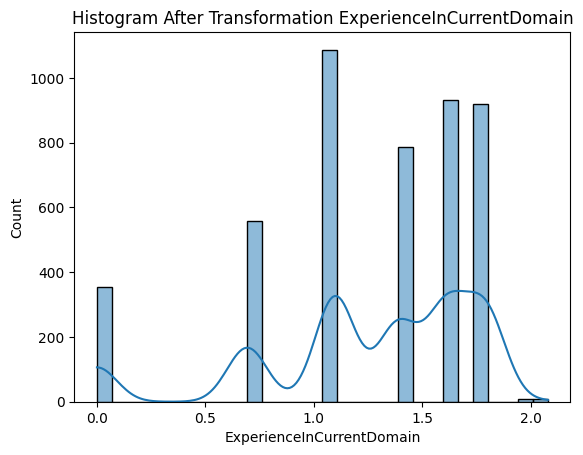

In [ ]:
# Transformation
transformation_features = ["JoiningYear","PaymentTier", "Age", "ExperienceInCurrentDomain"]

for feature in transformation_features:
  df[feature] = np.log1p(df[feature])
  sns.histplot(df[feature], kde=True, bins=30)
  plt.title(f"Histogram After Transformation {feature}")
  plt.show()


In [ ]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,7.609862,Bangalore,1.386294,3.555348,Male,No,0.000000,0
1,Bachelors,7.607878,Pune,0.693147,3.367296,Female,No,1.386294,1
2,Bachelors,7.608374,New Delhi,1.386294,3.663562,Female,No,1.098612,0
3,Masters,7.609367,Bangalore,1.386294,3.332205,Male,No,1.791759,1
4,Masters,7.609862,Pune,1.386294,3.218876,Male,Yes,1.098612,1


In [ ]:
# Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_features = df.select_dtypes(include=["object"]).columns
for feature in categorical_features:
  df[feature] = label_encoder.fit_transform(df[feature])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Education                  4653 non-null   int64  
 1   JoiningYear                4653 non-null   float64
 2   City                       4653 non-null   int64  
 3   PaymentTier                4653 non-null   float64
 4   Age                        4653 non-null   float64
 5   Gender                     4653 non-null   int64  
 6   EverBenched                4653 non-null   int64  
 7   ExperienceInCurrentDomain  4653 non-null   float64
 8   LeaveOrNot                 4653 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 327.3 KB


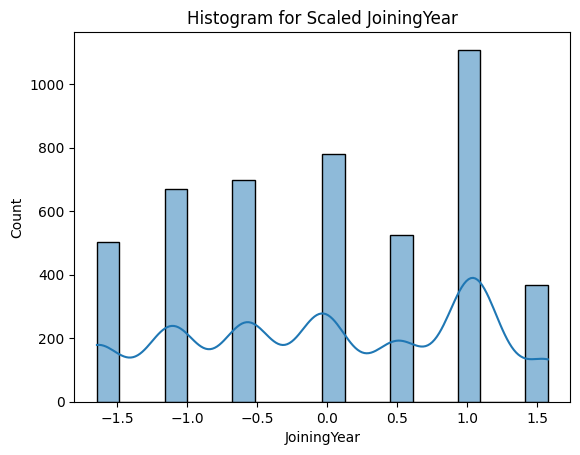

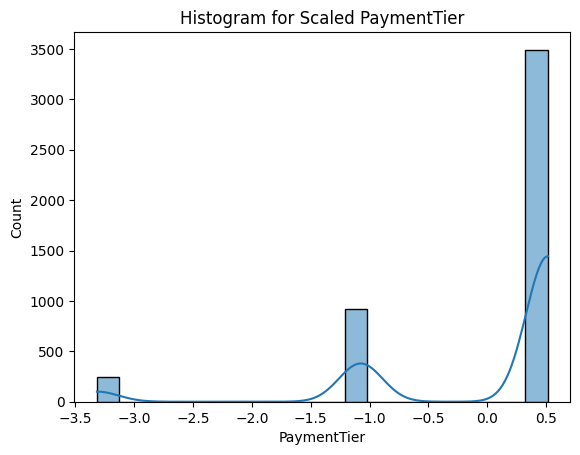

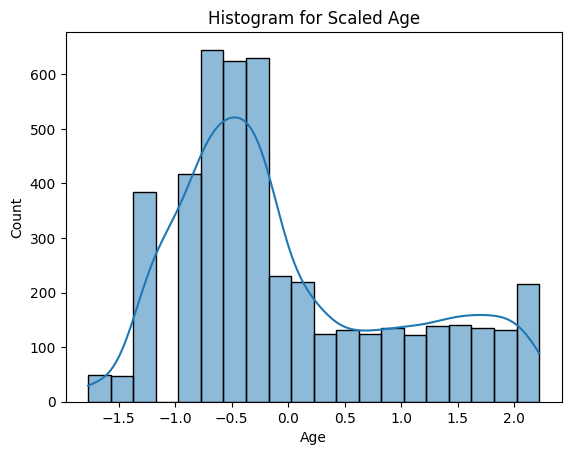

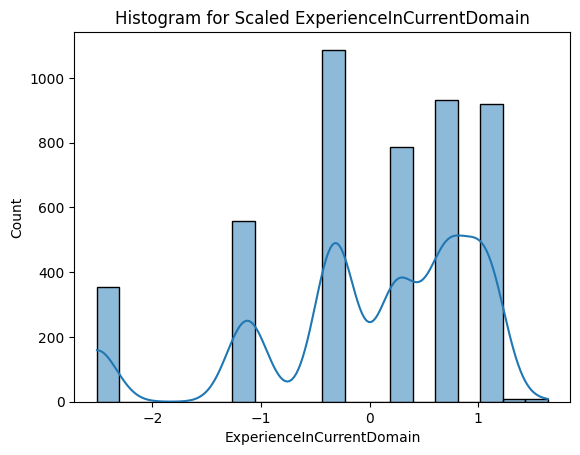

In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_numerical_features = df.select_dtypes(include=["int64","float64"]).columns
new_numerical_features = new_numerical_features.drop("LeaveOrNot")
df[new_numerical_features] = scaler.fit_transform(df[new_numerical_features])

# Visualize scaled data
for feature in numerical_features:
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f"Histogram for Scaled {feature}")
    plt.show()


In [ ]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,-0.507731,1.039546,-0.942740,0.513435,1.013720,0.821551,-0.338365,-2.510351,0
1,-0.507731,-1.107279,1.432872,-3.315084,-0.233190,-1.217210,-0.338365,0.257707,1
2,-0.507731,-0.570173,0.245066,0.513435,1.731248,-1.217210,-0.338365,-0.316717,0
3,1.411418,0.503239,-0.942740,0.513435,-0.465868,0.821551,-0.338365,1.067312,1
4,1.411418,1.039546,1.432872,0.513435,-1.217312,0.821551,2.955387,-0.316717,1


In [ ]:
from sklearn.model_selection import train_test_split
x = df.drop("LeaveOrNot", axis=1)
y = df["LeaveOrNot"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Defining MLP Module
import torch
import torch.nn as nn

class MLP(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(MLP, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size) # Input layer
    self.fc2 = nn.Linear(hidden_size, hidden_size) # Hidden layer
    self.fc3 = nn.Linear(hidden_size, output_size) # Output layer

    # self.activ = nn.SELU()
    # self.activ = nn.ReLU()
    # self.activ = nn.LeakyReLU()
    self.activ = nn.Sigmoid()

    # Weight Initialization
    # torch.nn.init.kaiming_uniform_(self.fc1.weight, mode="fan_in")
    # torch.nn.init.kaiming_uniform_(self.fc2.weight, mode="fan_in")
    # torch.nn.init.kaiming_uniform_(self.fc3.weight, mode="fan_in")
    # torch.nn.init.xavier_uniform_(self.fc1.weight)
    # torch.nn.init.xavier_uniform_(self.fc2.weight)
    # torch.nn.init.xavier_uniform_(self.fc3.weight)
    # torch.nn.init.zeros_(self.fc1.weight)
    # torch.nn.init.zeros_(self.fc2.weight)
    # torch.nn.init.zeros_(self.fc3.weight)
    torch.nn.init.ones_(self.fc1.weight)
    torch.nn.init.ones_(self.fc2.weight)
    torch.nn.init.ones_(self.fc3.weight)

    # Batch Normalization
    self.batch_norm = torch.nn.BatchNorm1d(hidden_size)

    # Dropout to prevent overfitting
    self.dropout = torch.nn.Dropout(p=0.4)

  def forward(self, x):
    x = self.fc1(x)
    x = self.activ(x)
    x = self.batch_norm(x)
    x = self.fc2(x)
    x = self.activ(x)
    x = self.fc3(x)
    return x





In [ ]:
# Covert to tensors
x_train = torch.FloatTensor(x_train.values)
x_test = torch.FloatTensor(x_test.values)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

In [ ]:
y_train.shape

torch.Size([3722])

In [ ]:
# Input Size, Hidden Layer size, Output size and model intilization
input_size = x_train.shape[1]
hidden_size = 64
output_size = 2
model = MLP(input_size, hidden_size, output_size)

In [ ]:
import torch.optim as optim
from sklearn.metrics import accuracy_score
from torch.utils.tensorboard import SummaryWriter

# Defining Loss function
loss_func = nn.CrossEntropyLoss()

# Optimization
optimizer = optim.RMSprop(model.parameters(), lr=0.01, momentum=0.2)

writer = SummaryWriter()

# Training Loops
num_epochs = 100
for epoch in range(num_epochs):
  output = model(x_train)
  loss = loss_func(output, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  writer.add_scalar("Loss/train", loss.item(), epoch)

# Evaluation
with torch.no_grad():
  model.eval()
  y_pred = model(x_test)
  _,predicted = torch.max(y_pred, 1)
  accuracy = accuracy_score(y_test, predicted)

writer.add_scalar("Accuracy/test",accuracy, 0)
print(f"accuracy:{accuracy*100:.2f}%")

writer.close()




accuracy:65.31%
